# Project has the following stages:

1.   Collecting Images with Expressions
1.   Detecting Faces in the Images and saving them
2.   Training our classifier on the Faces
1.   Recognition of expression in new Images


**Clone Repository**

In [1]:
!git clone https://github.com/misbah4064/facial_expressions.git

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14243, done.
remote: Total 14243 (delta 0), reused 0 (delta 0), pack-reused 14243
Receiving objects: 100% (14243/14243), 240.06 MiB | 28.59 MiB/s, done.
Resolving deltas: 100% (232/232), done.
Updating files: 100% (14004/14004), done.


**Creating necessary directories**

In [3]:
%cd facial_expressions/
%mkdir -p data_set/{anger,happy,neutral,sad,surprise}

[Errno 2] No such file or directory: 'facial_expressions/'
/content/facial_expressions


**Extracting Images with expressions**

In [12]:
import cv2
with open('anger.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/anger/"+image,loadedImage)
print("done writing")

done writing


In [9]:
%mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


# **Step 1 : Creating Data Set of Faces**

In [21]:
import cv2

with open('sad.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each Emotion, enter one numeric face id
face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("data_set/sad/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        count += 1

        # Save the captured image into the datasets folder
        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  3

 Done creating face data


In [17]:
%mkdir trainer

# **Step 2: Training Images**

In [18]:
import cv2
import numpy as np
from PIL import Image
import os

# Path for face image database
path = 'dataset'

recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

# function to get the images and label data
def getImagesAndLabels(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

print ("\n [INFO] Training faces....")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))

# Save the model into trainer/trainer.yml
recognizer.write('trainer/trainer.yml')

# Print the numer of Emotions trained and end program
print("\n [INFO] {0} Emotions trained. Exiting Program".format(len(np.unique(ids))))



 [INFO] Training faces....

 [INFO] 5 Emotions trained. Exiting Program


# **Step 3 : Recognition (Testing)**

In [19]:
import cv2
import numpy as np
import os

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

#iniciate id counter
id = 0

# Emotions related to ids: example ==> Anger: id=0,  etc
names = ['Anger', 'Happy', 'neutral', 'sad', 'surprise', 'None']

# Initialize and start realtime video capture
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video widht
cam.set(4, 480) # set video height

# Define min window size to be recognized as a face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

# ret, img =cam.read()
img = cv2.imread("dwayne.jpg")
# img = cv2.flip(img, -1) # Flip vertically

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor = 1.2,
    minNeighbors = 5,
    minSize = (int(minW), int(minH)),
    )

for(x,y,w,h) in faces:

    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

    # Check if confidence is less them 100 ==> "0" is perfect match
    if (confidence < 100):
        id = names[id]
        confidence = "  {0}%".format(round(100 - confidence))
    else:
        id = "unknown"
        confidence = "  {0}%".format(round(100 - confidence))

    cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
    cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)

cv2.imwrite("dwayne_johnson.jpg",img)

print("\n [INFO] Done detecting and Image is saved")
cam.release()
cv2.destroyAllWindows()


 [INFO] Done detecting and Image is saved


# **Display Detected Images**

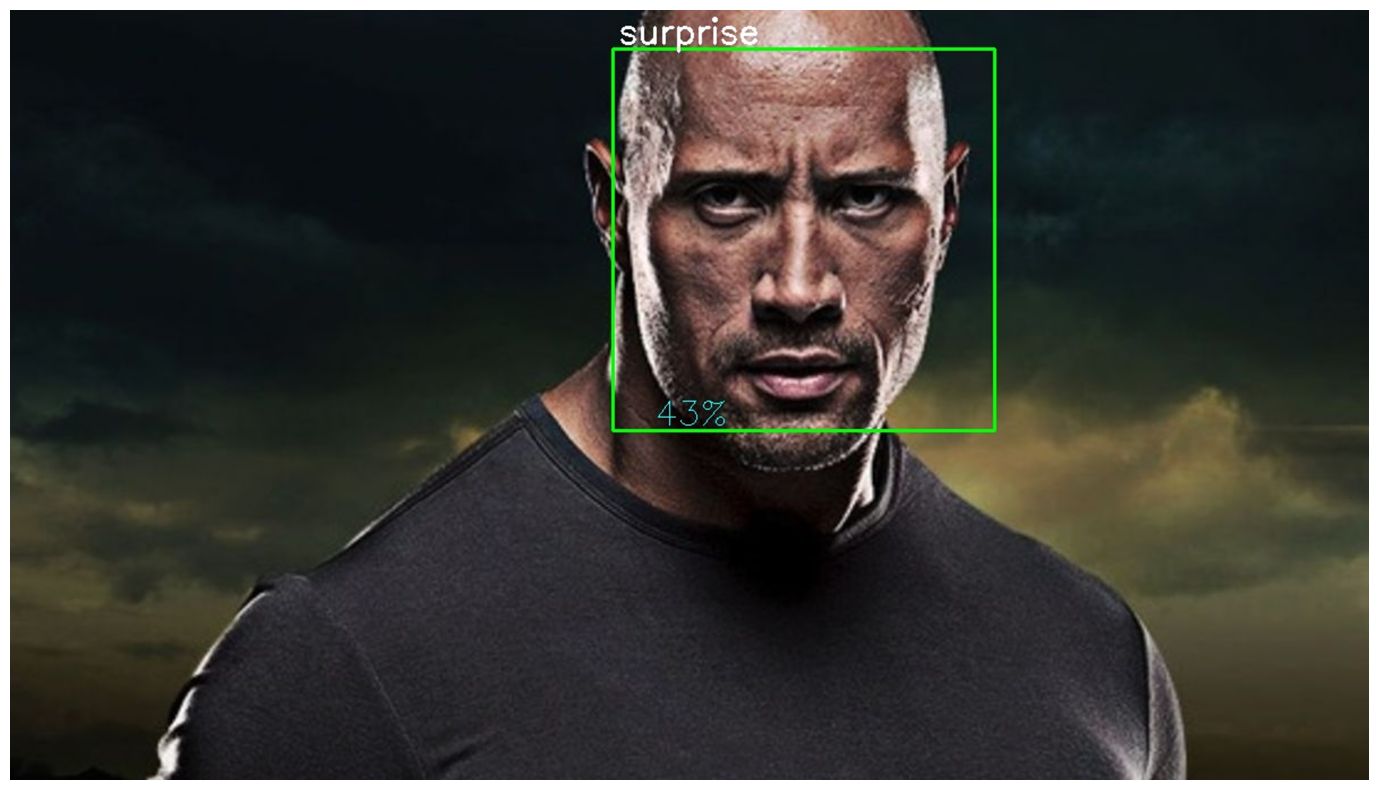

In [20]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("dwayne_johnson.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
pip install tensorflow

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Define paths to your dataset
train_data_dir = 'data_set/'
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 20% validation data

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes for 5 emotions
])

# Define loss function and optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Define a learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr = 0.0005
    if epoch > 20:
        lr = 0.0001
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,
    callbacks=[lr_scheduler])

# Save the model
model.save('emotion_recognition_model.h5')

Found 1000 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Epoch 1/30
31/31 [==============================] - 86s 3s/step - loss: 1.5565 - accuracy: 0.2676 - val_loss: 1.4763 - val_accuracy: 0.2857 - lr: 0.0010
Epoch 2/30
31/31 [==============================] - 60s 2s/step - loss: 1.4114 - accuracy: 0.4091 - val_loss: 1.4014 - val_accuracy: 0.3705 - lr: 0.0010
Epoch 3/30
31/31 [==============================] - 61s 2s/step - loss: 1.3848 - accuracy: 0.4236 - val_loss: 1.3696 - val_accuracy: 0.4330 - lr: 0.0010
Epoch 4/30
31/31 [==============================] - 60s 2s/step - loss: 1.2691 - accuracy: 0.4866 - val_loss: 1.2148 - val_accuracy: 0.5402 - lr: 0.0010
Epoch 5/30
31/31 [==============================] - 58s 2s/step - loss: 1.2310 - accuracy: 0.5062 - val_loss: 1.2436 - val_accuracy: 0.5045 - lr: 0.0010
Epoch 6/30
31/31 [==============================] - 58s 2s/step - loss: 1.1573 - accuracy: 0.5496 - val_loss: 1.2419 - val_accuracy: 0.4821 - lr: 0.0010

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,
    callbacks=[lr_scheduler]
)

Epoch 1/30
31/31 [==============================] - 69s 2s/step - loss: 0.6453 - accuracy: 0.7490 - val_loss: 1.1591 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 2/30
31/31 [==============================] - 60s 2s/step - loss: 0.6426 - accuracy: 0.7686 - val_loss: 1.2445 - val_accuracy: 0.5134 - lr: 0.0010
Epoch 3/30
31/31 [==============================] - 61s 2s/step - loss: 0.6207 - accuracy: 0.7676 - val_loss: 1.1473 - val_accuracy: 0.5491 - lr: 0.0010
Epoch 4/30
31/31 [==============================] - 60s 2s/step - loss: 0.6509 - accuracy: 0.7448 - val_loss: 1.2357 - val_accuracy: 0.5491 - lr: 0.0010
Epoch 5/30
31/31 [==============================] - 60s 2s/step - loss: 0.6731 - accuracy: 0.7603 - val_loss: 1.2653 - val_accuracy: 0.5848 - lr: 0.0010
Epoch 6/30
31/31 [==============================] - 61s 2s/step - loss: 0.6078 - accuracy: 0.7676 - val_loss: 1.3051 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 7/30
31/31 [==============================] - 66s 2s/step - loss: 0.5087 - a

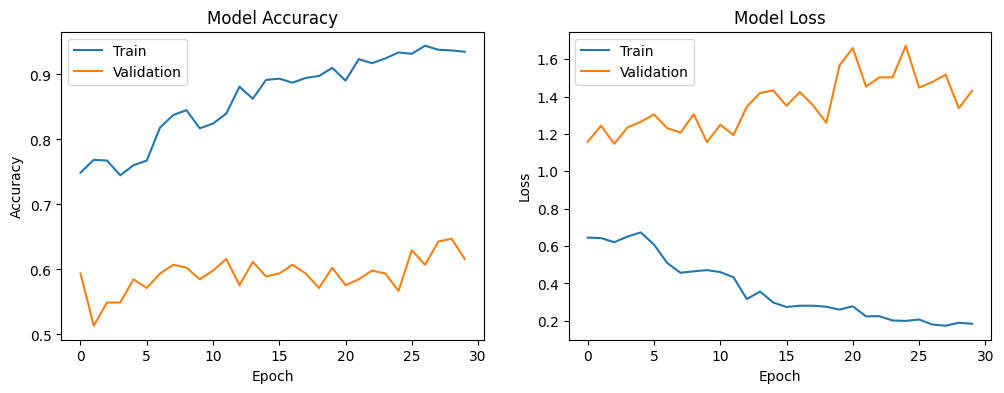

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

8/8 [==============================] - 4s 476ms/step


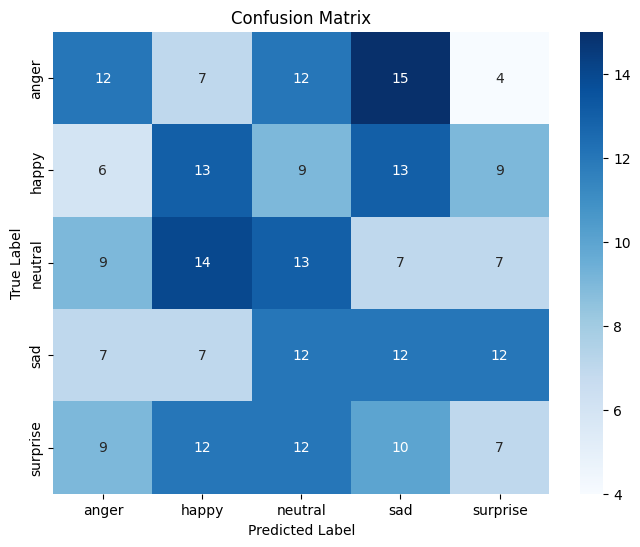

              precision    recall  f1-score   support

       anger       0.28      0.24      0.26        50
       happy       0.25      0.26      0.25        50
     neutral       0.22      0.26      0.24        50
         sad       0.21      0.24      0.22        50
    surprise       0.18      0.14      0.16        50

    accuracy                           0.23       250
   macro avg       0.23      0.23      0.23       250
weighted avg       0.23      0.23      0.23       250



In [26]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predictions
Y_pred = model.predict(validation_generator, validation_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
class_names = list(validation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

Found 1000 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Epoch 1/30
31/31 [==============================] - 62s 2s/step - loss: 1.7022 - accuracy: 0.2686 - val_loss: 1.4702 - val_accuracy: 0.2991 - lr: 0.0010
Epoch 2/30
31/31 [==============================] - 61s 2s/step - loss: 1.5201 - accuracy: 0.3048 - val_loss: 1.4561 - val_accuracy: 0.3170 - lr: 0.0010
Epoch 3/30
31/31 [==============================] - 60s 2s/step - loss: 1.4701 - accuracy: 0.3399 - val_loss: 1.4492 - val_accuracy: 0.3304 - lr: 0.0010
Epoch 4/30
31/31 [==============================] - 60s 2s/step - loss: 1.3983 - accuracy: 0.4153 - val_loss: 1.3519 - val_accuracy: 0.4062 - lr: 0.0010
Epoch 5/30
31/31 [==============================] - 61s 2s/step - loss: 1.3263 - accuracy: 0.4143 - val_loss: 1.3123 - val_accuracy: 0.4509 - lr: 0.0010
Epoch 6/30
31/31 [==============================] - 61s 2s/step - loss: 1.2763 - accuracy: 0.4824 - val_loss: 1.2898 - val_accuracy: 0.4464 - lr: 0.0010

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


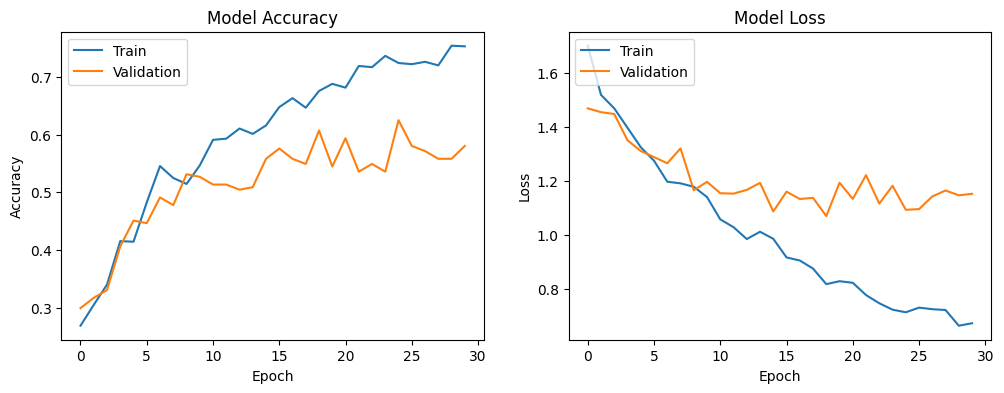

8/8 [==============================] - 6s 716ms/step


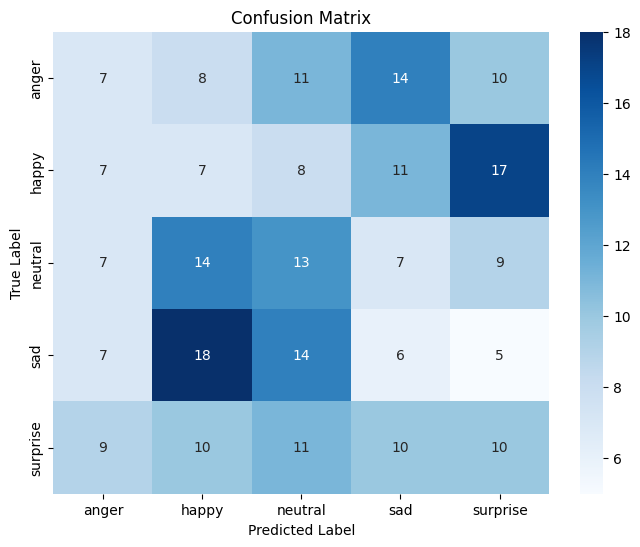

              precision    recall  f1-score   support

       anger       0.19      0.14      0.16        50
       happy       0.12      0.14      0.13        50
     neutral       0.23      0.26      0.24        50
         sad       0.12      0.12      0.12        50
    surprise       0.20      0.20      0.20        50

    accuracy                           0.17       250
   macro avg       0.17      0.17      0.17       250
weighted avg       0.17      0.17      0.17       250



In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define paths to your dataset
train_data_dir = 'data_set/'
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 20% validation data

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes for 5 emotions
])

# Define loss function and optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Define a learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr = 0.0005
    if epoch > 20:
        lr = 0.0001
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model and store the training history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,
    callbacks=[lr_scheduler]
)

# Save the model
model.save('emotion_recognition_model.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Get true labels and predictions
Y_pred = model.predict(validation_generator, validation_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
class_names = list(validation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

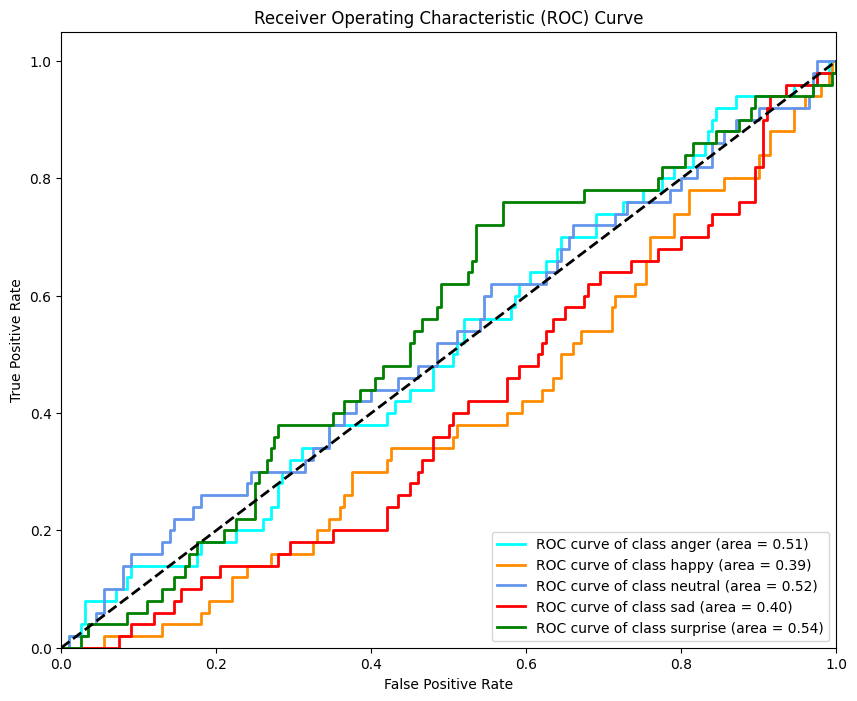

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output
y_true_binarized = label_binarize(y_true, classes=[0, 1, 2, 3, 4])
n_classes = y_true_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()